In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline



# Import the CSV file
wine_path = '/Users/andrewmccarthy/Desktop/me-315/ProjectME315/data/winequality-white.csv'

wine_df = pd.read_csv(wine_path)

# Display the first few rows of the dataframe
print(wine_df.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [155]:
print(wine_df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [157]:
correlation_matrix = wine_df.corr()
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

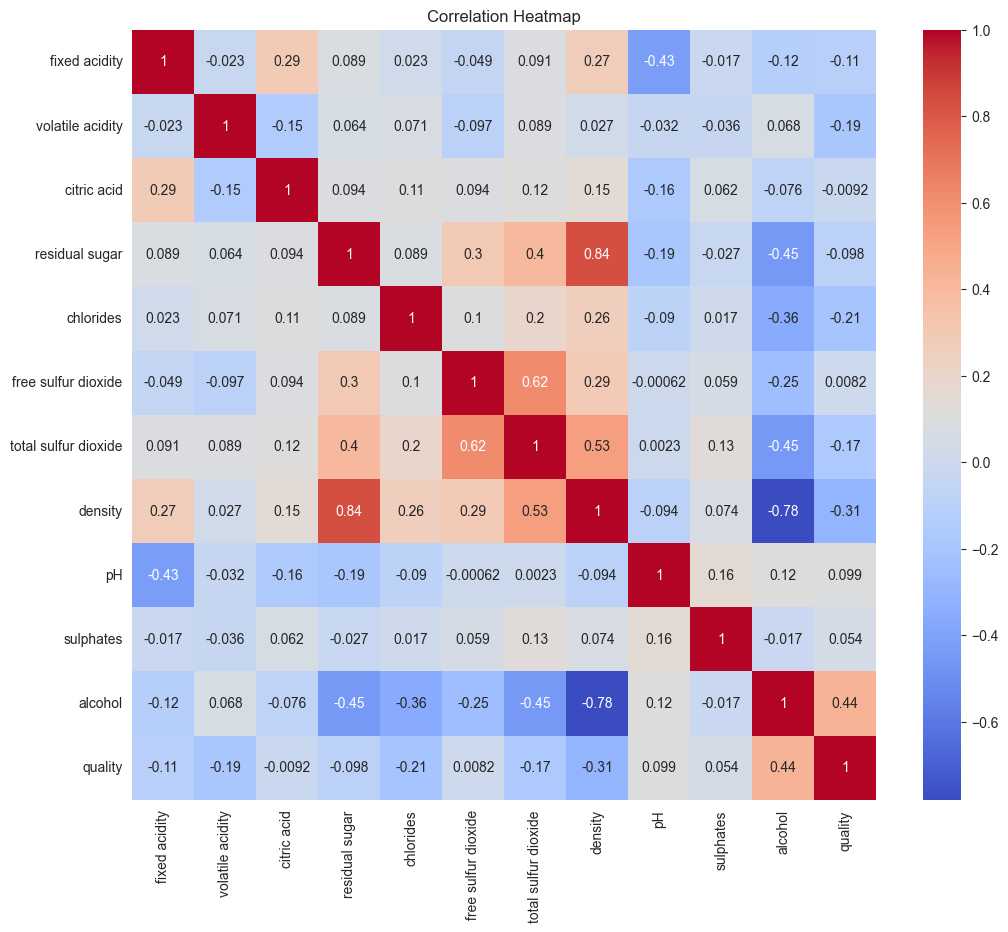

In [158]:
plt.figure(figsize=(12, 10))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

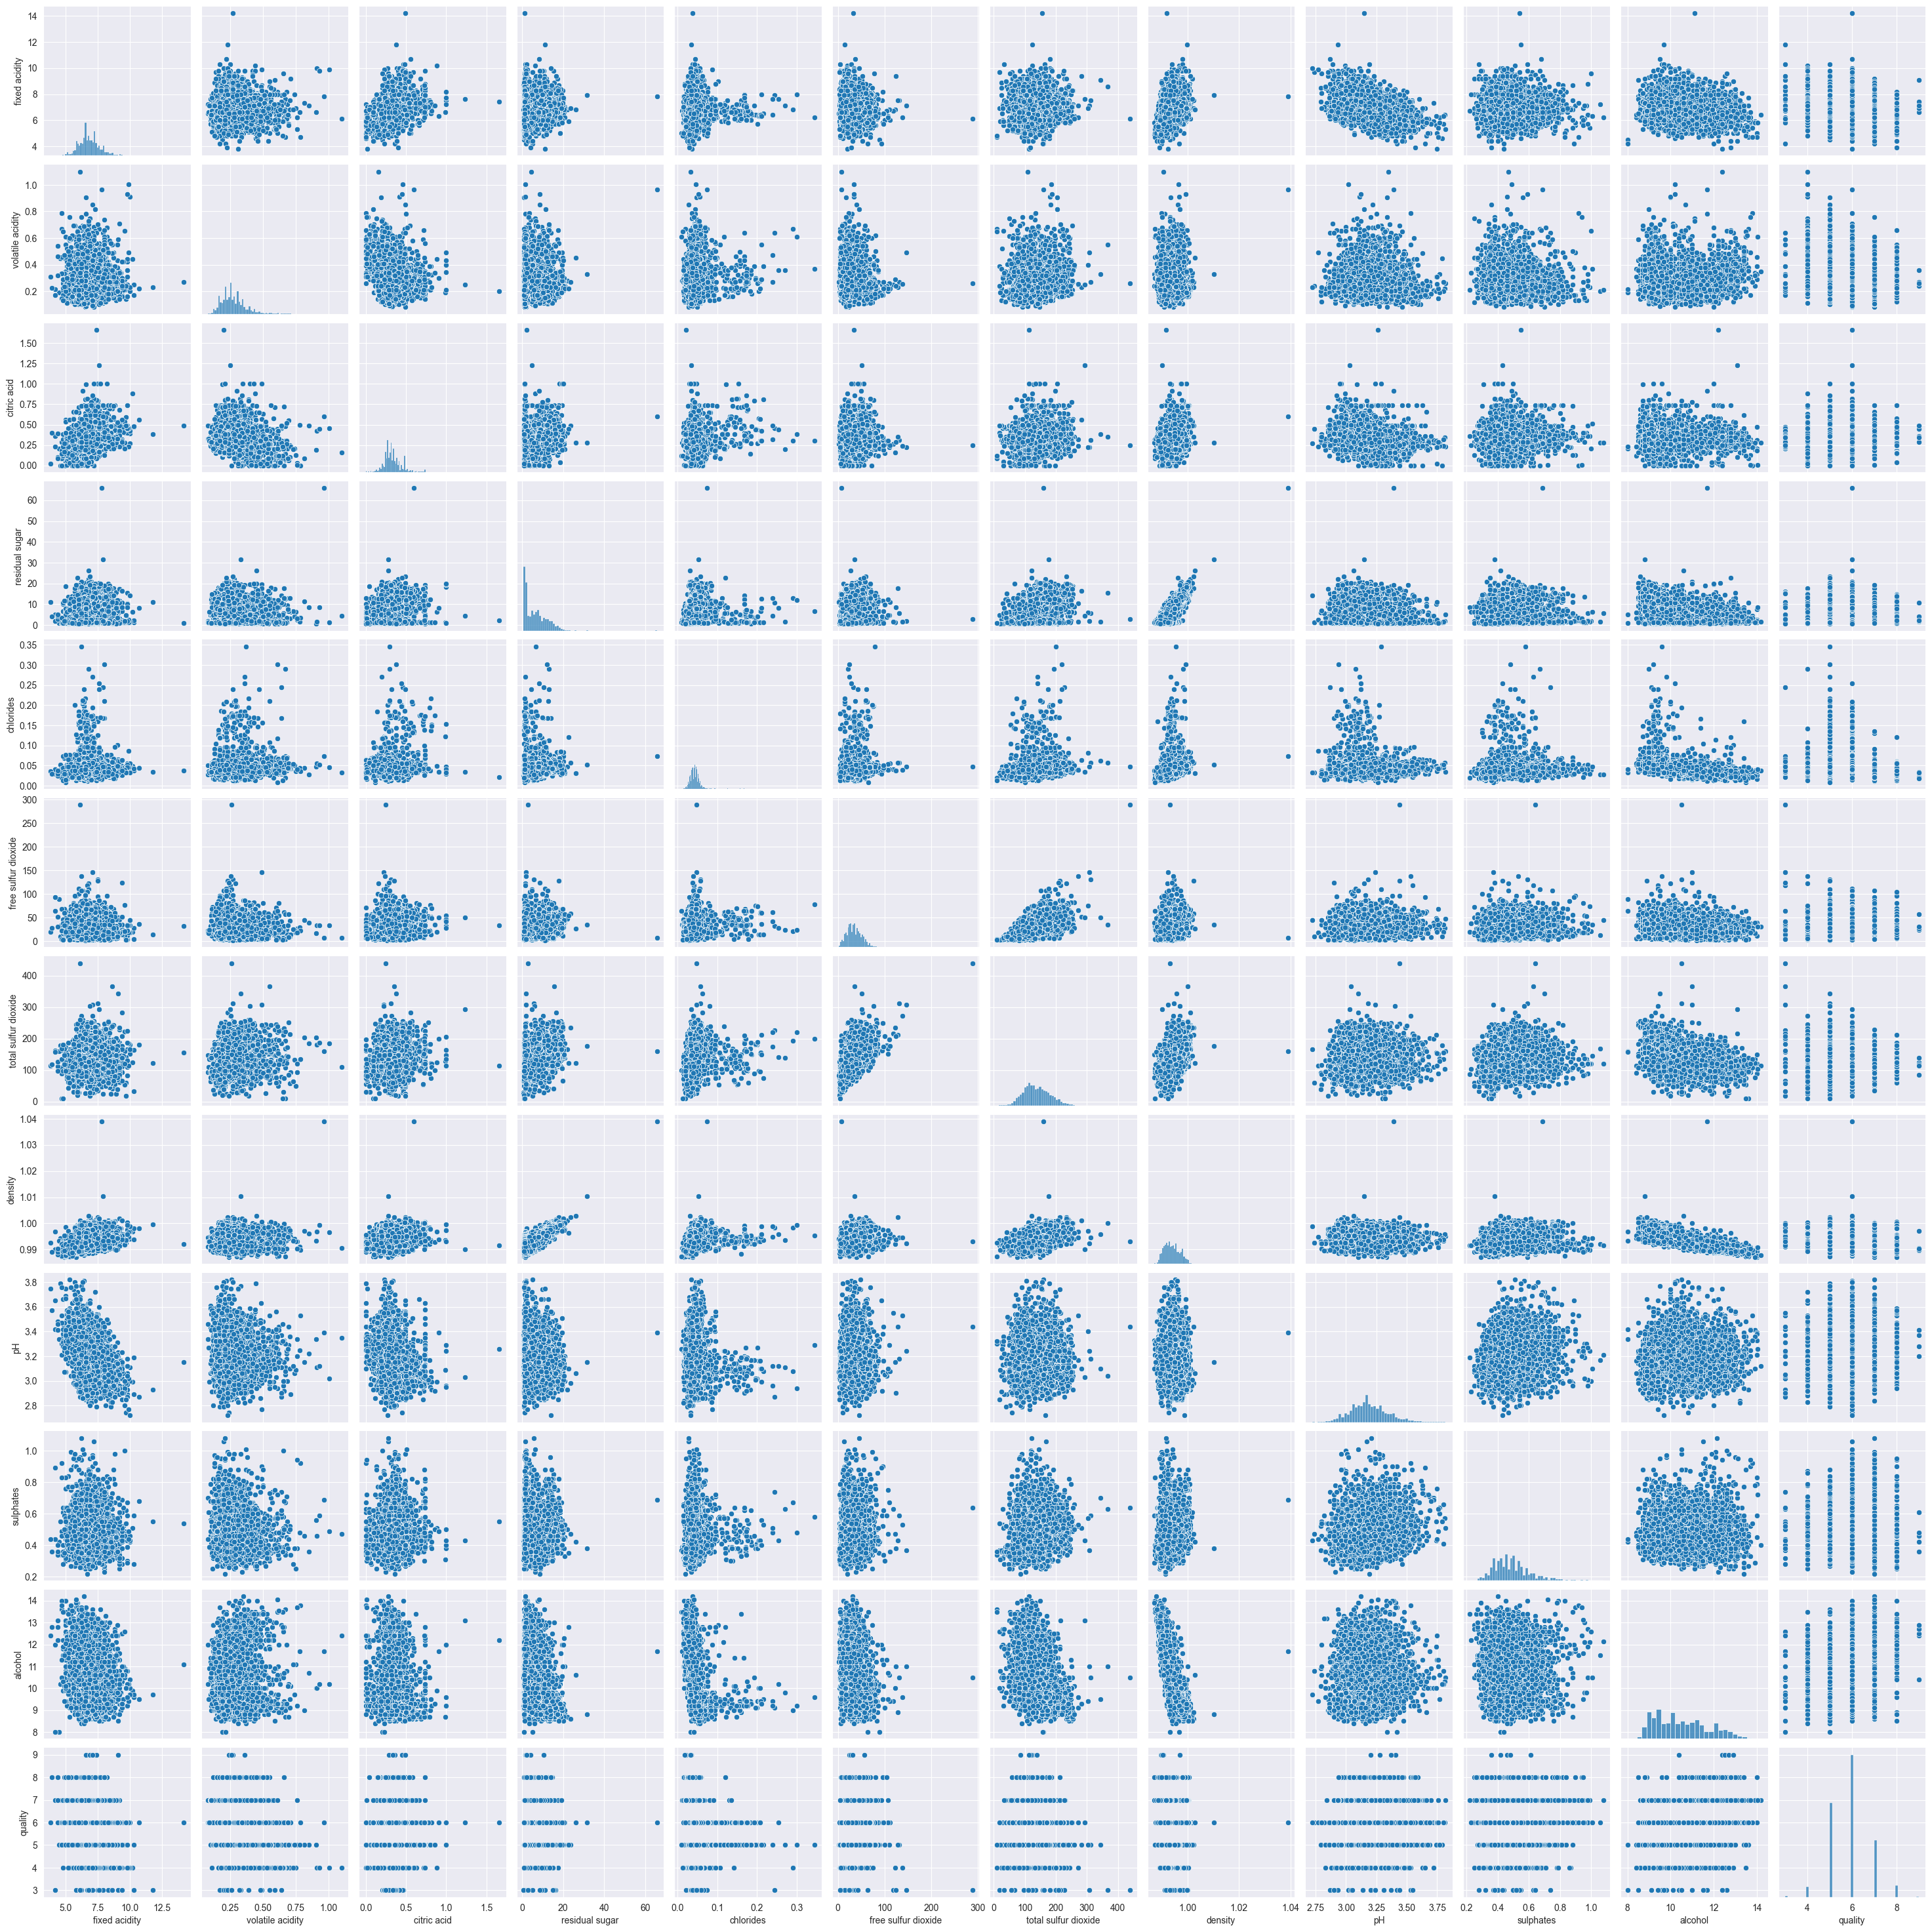

In [156]:
sns.pairplot(wine_df)

In [159]:
wine_df['residual sugar_squared'] = wine_df['residual sugar'] ** 2
wine_df['chlorides_squared'] = wine_df['chlorides'] ** 2

In [141]:
X = wine_df.drop(columns=['quality', 'density'])
y = wine_df['quality']
print(X.shape)

(4898, 12)


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
# Display the shape of training and test sets
print("Shape of Wine_train:", X_train.shape)
print("Shape of Wine_test:", X_test.shape)

Shape of Wine_train: (3918, 12)
Shape of Wine_test: (980, 12)


In [162]:
# add a constant term (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
# Fit the linear regression model
lm_fit = sm.OLS(y_train, X_train).fit()
# Make predictions on test set
lm_pred = lm_fit.predict(X_test)
# Calculate mean squared error
mse = mean_squared_error(y_test, lm_pred)
print("Test Mean Squared Error:", mse)

Test Mean Squared Error: 0.5805951599286858


In [147]:
# add a constant term (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
# Fit the linear regression model
lm_fit = sm.OLS(y_train, X_train).fit()
# Make predictions on test set
lm_pred = round(lm_fit.predict(X_test))
# Calculate mean squared error
mse = mean_squared_error(y_test, lm_pred)
print("Test Mean Squared Error:", mse)

Test Mean Squared Error: 0.6234693877551021


In [163]:
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     121.7
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          1.31e-258
Time:                        14:54:44   Log-Likelihood:                -4449.0
No. Observations:                3918   AIC:                             8924.
Df Residuals:                    3905   BIC:                             9006.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

In [130]:
# Define the parameter grid with alpha values
param_grid = {
'lasso__alpha': np.logspace(-3, 2, 50) # Range of alpha values from 0.001 to 100
}
# Create a pipeline for standardization and ElasticNet (as Lasso) regression
pipeline = Pipeline([
('scaler', StandardScaler()),
('lasso', ElasticNet(l1_ratio=1, random_state=5)) # l1_ratio=1 makes it equivalent to Las
])
# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
# Fit GridSearchCV
grid_search.fit(X_train, y_train)
# Print the best alpha parameter found
print("Best alpha parameter:", grid_search.best_params_['lasso__alpha'])
# Get the best model
best_model = grid_search.best_estimator_
# Print coefficients of the final model
print("Coefficients of the final lasso model:")
lasso_coefs = best_model.named_steps['lasso'].coef_
print(lasso_coefs)
# Predict on test set
y_pred = best_model.predict(X_test)
# Calculate mean squared error (test error)
mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error:", mse)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best alpha parameter: 0.002559547922699536
Coefficients of the final lasso model:
[ 0.         -0.03327967 -0.19903731 -0.          0.14408581 -0.00711274
  0.07539026 -0.04242412  0.01979953  0.03803499  0.44098118 -0.01778507
  0.        ]
Test Mean Squared Error: 0.5827317011220994


In [172]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'alpha': [0.1, 1.0, 10.0, 50.0, 60.0, 65.0, 68.0, 70.0, 72.0, 75.0, 80.0, 100.0, 150.0]}
ridge = Ridge(random_state=11)
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Ridge parameters:", grid_search.best_params_)
ridge_pred = grid_search.predict(X_test_scaled)
mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Mean Squared Error:", mse)

Best Ridge parameters: {'alpha': 70.0}
Ridge Mean Squared Error: 0.5806459135317085


In [132]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9],
    'max_iter': [100, 1000, 2000, 3000, 4000, 5000]
}
elastic_net = ElasticNet(random_state=5)
grid_search = GridSearchCV(elastic_net, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best ElasticNet parameters:", grid_search.best_params_)
elastic_net_pred = grid_search.predict(X_test_scaled)
mse = mean_squared_error(y_test, elastic_net_pred)
print("ElasticNet Mean Squared Error:", mse)

Best ElasticNet parameters: {'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 100}
ElasticNet Mean Squared Error: 0.587577986055239


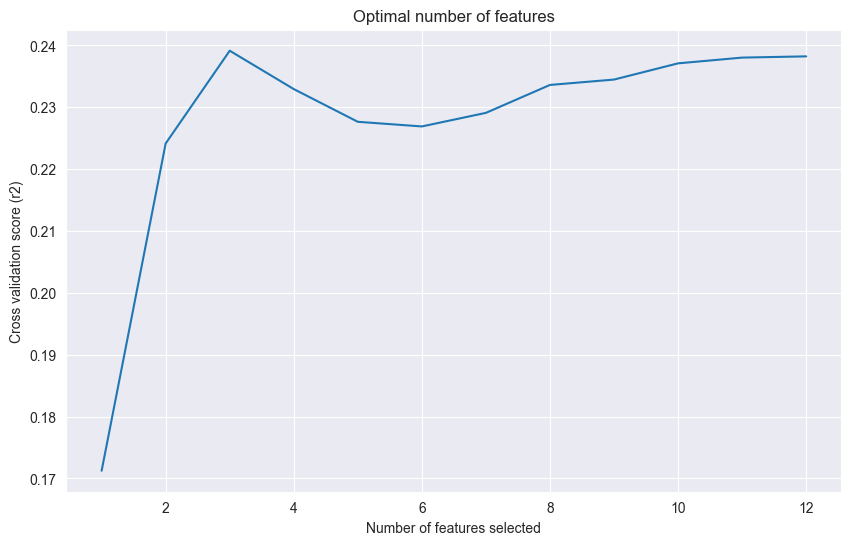

Optimal number of features: 3
Selected features: ['volatile acidity', 'residual sugar', 'alcohol']
volatile acidity: -0.2123
residual sugar: 0.1349
alcohol: 0.4609
Cross-validated R2 scores: [0.16758386 0.28697267 0.24685264 0.29265384 0.20161558]
Mean R2 score: 0.2391


In [133]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the RFE object and compute a cross-validated score for each number of features
model = LinearRegression()
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2', n_jobs=-1)
rfecv = rfecv.fit(X_scaled, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.title("Optimal number of features")
plt.show()

# Print the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

# Get the selected features
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
selected_features = [feature for feature, selected in zip(feature_names, rfecv.support_) if selected]
print("Selected features:", selected_features)

# Fit the model using the selected features
X_selected = X_scaled[:, rfecv.support_]
final_model = LinearRegression().fit(X_selected, y)

# Print the coefficients of the final model
for feature, coef in zip(selected_features, final_model.coef_):
    print(f"{feature}: {coef:.4f}")

# Evaluate the final model
scores = cross_val_score(final_model, X_selected, y, cv=5, scoring='r2')
print(f"Cross-validated R2 scores: {scores}")
print(f"Mean R2 score: {np.mean(scores):.4f}")

In [134]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

lm_fit_3terms = sm.OLS(y_train, sm.add_constant(X_train_rfe)).fit()
# Make predictions on test set
lm_pred_3terms = lm_fit_3terms.predict(sm.add_constant(X_test_rfe))

In [135]:
print("X_train_rfe shape:", X_train_rfe.shape)
print("X_test_rfe shape:", X_test_rfe.shape)

X_train_rfe shape: (3918, 3)
X_test_rfe shape: (980, 3)


In [115]:
X_train_rfe_const = sm.add_constant(X_train_rfe)
X_test_rfe_const = sm.add_constant(X_test_rfe)

In [136]:
lm_fit_3terms = sm.OLS(y_train, X_train_rfe_const).fit()
lm_pred_3terms = lm_fit_3terms.predict(X_test_rfe_const)

In [137]:
print("y_test shape:", y_test.shape)
print("X_test_rfe shape:", X_test_rfe.shape)

y_test shape: (980,)
X_test_rfe shape: (980, 3)


In [152]:
mse = mean_squared_error(y_test, lm_pred_3terms)
print("Test Mean Squared Error:", mse)

Test Mean Squared Error: 0.6023539004320082


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     459.9
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          5.58e-256
Time:                        17:31:48   Log-Likelihood:                -4479.9
No. Observations:                3918   AIC:                             8968.
Df Residuals:                    3914   BIC:                             8993.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8724      0.012    483.931      0.000       5.849       5.896
x1            -0.2174      0.012    -17.779      0.000      -0.241      -0.193
x2             0.1357      0.014      9.999      0.000       0.109       0.162
x3             0.4561      0.014     33.618      0.000       0.430       0.483
==============================================================================
Omnibus:                       76.626   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.819
Skew:                           0.030   Prob(JB):                     1.98e-35
Kurtosis:                       3.988   Cond. No.                         1.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

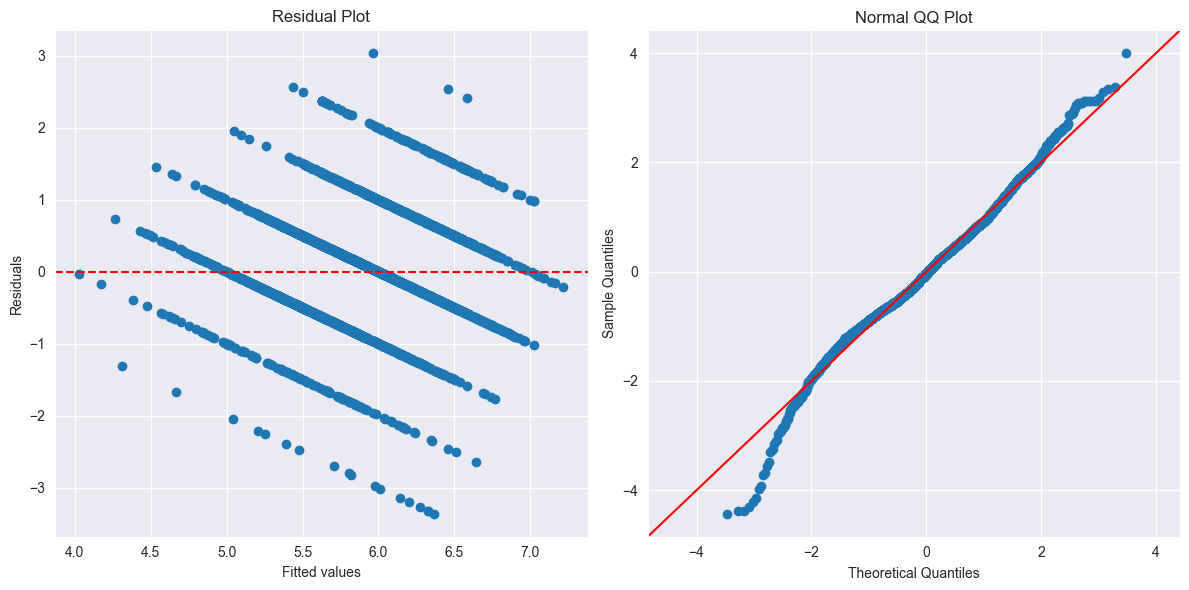

In [138]:
residuals = lm_fit_3terms.resid
fitted = lm_fit_3terms.fittedvalues
plt.figure(figsize=(12, 6)) #This specifies that the figure should be 12 inches wid
# Residual plot
plt.subplot(1, 2, 1)
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
# Normal QQ plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line ='45', fit=True, ax=plt.gca())
plt.title('Normal QQ Plot')
plt.tight_layout()

In [139]:
# Assuming X_train is your original DataFrame before scaling
feature_names = X_train.columns.tolist()

rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Get the names of selected features
selected_features = [feature for feature, selected in zip(feature_names, rfe.support_) if selected]

print("Selected features:")
for feature in selected_features:
    print(feature)

# Optionally, you can also see the ranking of all features
feature_ranking = dict(zip(feature_names, rfe.ranking_))
print("\nFeature ranking (lower is better):")
for feature, rank in sorted(feature_ranking.items(), key=lambda x: x[1]):
    print(f"{feature}: {rank}")

Selected features:
volatile acidity
residual sugar
alcohol

Feature ranking (lower is better):
volatile acidity: 1
residual sugar: 1
alcohol: 1
free sulfur dioxide: 2
total sulfur dioxide: 3
sulphates: 4
fixed acidity: 5
residual sugar_squared: 6
chlorides: 7
chlorides_squared: 8
pH: 9
citric acid: 10
const: 11


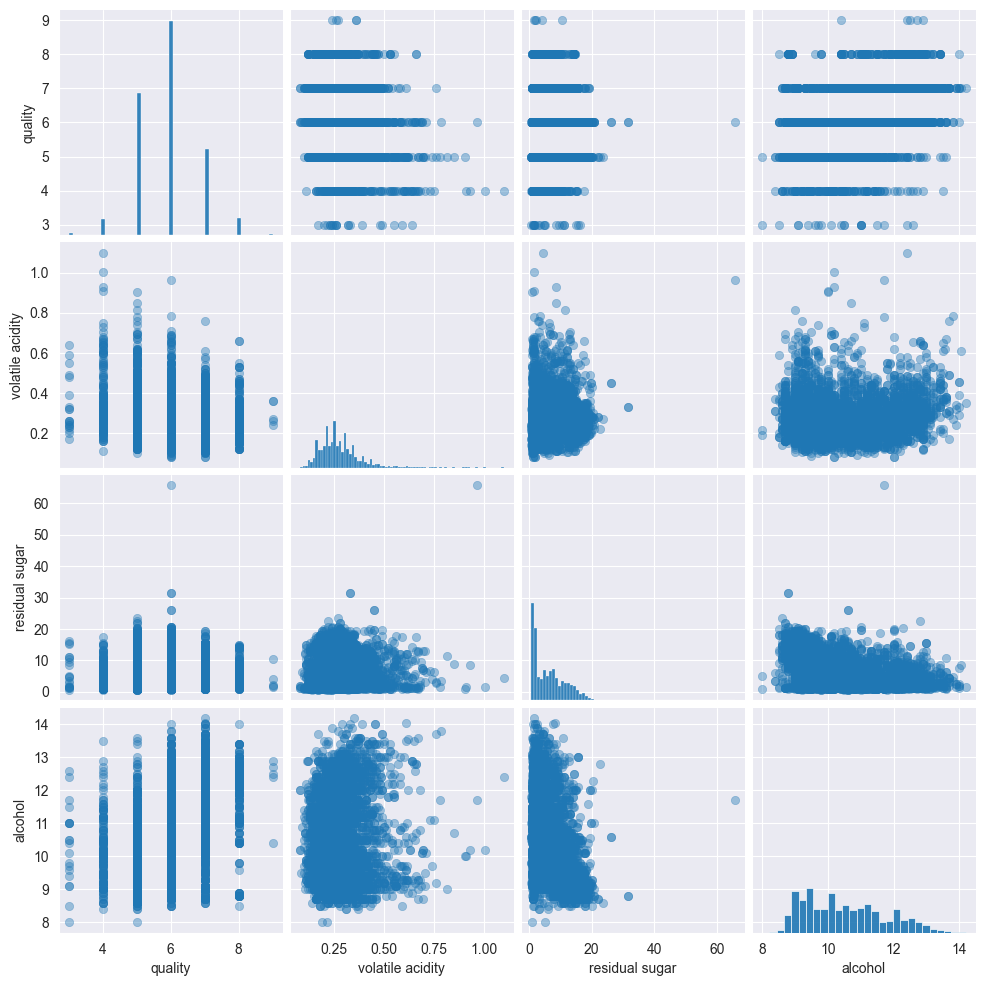

In [205]:
sns.pairplot(wine_df[['quality', 'volatile acidity', 'residual sugar', 'alcohol']], 
             plot_kws={'alpha': 0.4, 'edgecolor': None},
             diag_kws={'alpha': 0.9})

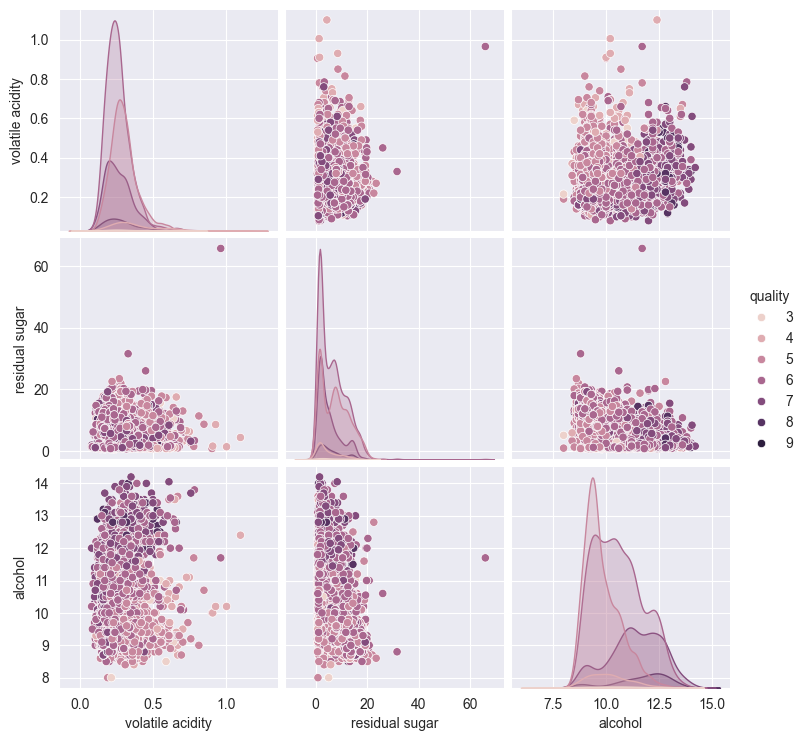

In [196]:
sns.pairplot(wine_df[['quality', 'volatile acidity', 'residual sugar', 'alcohol']], hue='quality',)


In [202]:
X_final = wine_df[['volatile acidity','residual sugar','alcohol']]
y_final = wine_df['quality']
print(X.shape)

(4898, 3)


In [203]:
X_train_final, X_test_final, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=11)
# add a constant term (intercept)
X_train_final = sm.add_constant(X_train_final)
X_test_final = sm.add_constant(X_test_final)
# Fit the linear regression model
lm_fit_final = sm.OLS(y_train, X_train_final).fit()
# Make predictions on test set
lm_pred_final = lm_fit_final.predict(X_test_final)
# Calculate mean squared error"
mse_final = mean_squared_error(y_test, lm_pred_final)
print("Test Mean Squared Error:", mse_final)

Test Mean Squared Error: 0.6023539004320082


In [204]:
lm_fit_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     459.9
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          5.58e-256
Time:                        18:07:59   Log-Likelihood:                -4479.9
No. Observations:                3918   AIC:                             8968.
Df Residuals:                    3914   BIC:                             8993.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.3908      0.127     18.878      0.000       2.142       2.639
volatile acidity    -2.1980      0.124    -17.779      0.000      -2.440      -1.956
residual sugar       0.0266      0.003      9.999      0.000       0.021       0.032
alcohol              0.3736      0.011     33.618      0.000       0.352       0.395
==============================================================================
Omnibus:                       76.626   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.819
Skew:                           0.030   Prob(JB):                     1.98e-35
Kurtosis:                       3.988   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""